# 성능 최적화


## 1.데이터 준비

### (1) 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

### (2) 데이터 업로드

In [ ]:
# mobile data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv"
data = pd.read_csv(path)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,4,unsat,no,STAY
1,1,36147,0,13,800586,244,6,unsat,considering,STAY
2,1,27273,230,0,305049,201,15,unsat,perhaps,STAY
3,0,120070,38,33,788235,780,2,unsat,considering,LEAVE
4,1,29215,208,85,224784,241,1,very_unsat,never_thought,STAY


|변수 명|내용|구분|
|----|----|----|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


In [ ]:
# 데이터분할1
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['REPORTED_SATISFACTION','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.4, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 2.모델링

### (1) Random Search

작업 순서

    1) 파라미터의 범위 지정
    2) 함수 불러오기
        - 알고리즘
        - Random Search
    3) 모델 선언
        - 기본 모델
        - Random Search 모델
    4) 학습
    5) 예측
    6) 평가



In [ ]:
# 1) random하게 찾을 범위를 지정
# 지정하지 않는 파라미터는 default 값으로 지정됨
# 1) 파라미터를 dictionary형태로 선언
rand_param = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19]  # 9
                , 'metric' : ['euclidean', 'manhattan']  # 2
}

rand_param

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'metric': ['euclidean', 'manhattan']}

In [ ]:
# 2) 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier

# Random Search를 수행해 줄 함수!
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 3) 모델선언
# 기본모델
knn_model = KNeighborsClassifier()

# Random Search 설정.
rand_model = RandomizedSearchCV(knn_model
                          , rand_param              # hyperparameter 범위 지정.
                          , cv=5                    # k-fold Cross Validation
                          , scoring='accuracy'
                          , n_iter=5                # Random하게 시도할 횟수
                          )

In [ ]:
# 4) 학습 : knn_model이 아니라 rand_model !!
rand_model.fit(x_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19]},
                   scoring='accuracy')

In [ ]:
# 시행에 대한 정보.
rand_model.cv_results_

{'mean_fit_time': array([0.07916307, 0.02680535, 0.02934999, 0.02943792, 0.03050766]),
 'std_fit_time': array([0.02821141, 0.00038275, 0.00583826, 0.0055479 , 0.00891131]),
 'mean_score_time': array([1.21437092, 0.32169781, 0.26803598, 0.45425634, 0.39897356]),
 'std_score_time': array([0.37849988, 0.05563376, 0.03848202, 0.07034735, 0.08086907]),
 'param_n_neighbors': masked_array(data=[5, 15, 7, 15, 3],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_metric': masked_array(data=['manhattan', 'euclidean', 'euclidean', 'manhattan',
                    'manhattan'],
              mask=[False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'n_neighbors': 5, 'metric': 'manhattan'},
  {'n_neighbors': 15, 'metric': 'euclidean'},
  {'n_neighbors': 7, 'metric': 'euclidean'},
  {'n_neighbors': 15, 'metric': 'manhattan'},
  {'n_neighbors': 3, 'metric': 'manhattan'}],
 'split0_test_score': array([0

In [ ]:
# 최적의 파라미터
rand_model.best_params_

{'n_neighbors': 15, 'metric': 'manhattan'}

In [ ]:
 # 최적의 성능
rand_model.best_score_

np.float64(0.6495833333333333)

In [ ]:
# 5) 예측 및 평가(최적의 파라미터로)
pred = rand_model.predict(x_val_s)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_val, pred))

[[2389 1511]
 [1308 2792]]


In [ ]:
print(classification_report(y_val, pred, digits = 4))

              precision    recall  f1-score   support

       LEAVE     0.6462    0.6126    0.6289      3900
        STAY     0.6488    0.6810    0.6645      4100

    accuracy                         0.6476      8000
   macro avg     0.6475    0.6468    0.6467      8000
weighted avg     0.6476    0.6476    0.6472      8000



### (2) Grid Search

* random search는 범위 내에서 무작위로 수행하는 반면
* grid search는 범위 내의 모든 경우의 수 만큼 수행

작업 순서

    1) 파라미터의 범위 지정
    2) 함수 불러오기
        - 알고리즘
        - Grid Search
    3) 모델 선언
        - 모델
        - Grid Search
    4) 학습
    5) 예측
    6) 평가



In [ ]:
# 1) 파라미터를 dictionary형태로 선언
grid_param = {
    'n_neighbors' : list(range(2,70, 3)) # 2부터 70까지 3간격으로
    , 'metric' : ['euclidean', 'manhattan']
}
grid_param

{'n_neighbors': [2,
  5,
  8,
  11,
  14,
  17,
  20,
  23,
  26,
  29,
  32,
  35,
  38,
  41,
  44,
  47,
  50,
  53,
  56,
  59,
  62,
  65,
  68],
 'metric': ['euclidean', 'manhattan']}

In [ ]:
# 2) 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # 이번엔 GridSearchCV

In [ ]:
# 3) 모델 선언
knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn,
                     grid_param,
                     cv = 3    # k-fold cross validation
                     ) # scoring을 생략하면, 기본값으로 분류는 accuracy, 회귀는 r2_score

In [ ]:
# 4) 학습 :
knn_gs.fit(x_train_s, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 5, 8, 11, 14, 17, 20, 23, 26, 29,
                                         32, 35, 38, 41, 44, 47, 50, 53, 56, 59,
                                         62, 65, 68]})

In [ ]:
# 최적의 파라미터를 찾아준다
knn_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 65}

In [ ]:
knn_gs.best_score_

np.float64(0.6585833333333332)

In [ ]:
# 5) 예측 및 평가
pred = knn_gs.predict(x_val_s)
accuracy_score(y_val, pred)

0.648875

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred  ))

[[2237 1663]
 [1146 2954]]


In [ ]:
print(classification_report(y_val, pred  ))

              precision    recall  f1-score   support

       LEAVE       0.66      0.57      0.61      3900
        STAY       0.64      0.72      0.68      4100

    accuracy                           0.65      8000
   macro avg       0.65      0.65      0.65      8000
weighted avg       0.65      0.65      0.65      8000



* 튜닝 결과를 데이터프레임으로 저장

In [ ]:
knn_gs.cv_results_

{'mean_fit_time': array([0.0234429 , 0.03453732, 0.02721381, 0.02271652, 0.02532125,
        0.02304165, 0.02314417, 0.02851423, 0.03420472, 0.02209417,
        0.02251792, 0.0219326 , 0.02653297, 0.0344522 , 0.02370159,
        0.02255233, 0.02216029, 0.02211547, 0.02816463, 0.02216625,
        0.0224762 , 0.02201986, 0.03514624, 0.02313932, 0.04453484,
        0.07476791, 0.06924462, 0.02291505, 0.02905258, 0.02296543,
        0.02292919, 0.02239855, 0.03358237, 0.02251482, 0.02211499,
        0.0221502 , 0.03321648, 0.0222133 , 0.02282127, 0.02859465,
        0.02287285, 0.02773094, 0.02892868, 0.02200357, 0.02327538,
        0.02690013]),
 'std_fit_time': array([1.08132830e-03, 8.94809120e-03, 7.07752676e-03, 7.70422871e-05,
        3.44170346e-03, 7.91023678e-05, 4.06389781e-04, 7.85408963e-03,
        8.67796729e-03, 2.15629304e-04, 3.19402778e-04, 8.83464433e-05,
        5.68010999e-03, 8.95422532e-03, 1.59579259e-03, 6.80305551e-04,
        3.86698374e-04, 1.64503061e-04, 8.837

In [ ]:
result = pd.DataFrame(knn_gs.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023443,0.001081,0.389235,0.063790,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.59775,0.59700,0.59550,0.596750,0.000935,46
1,0.034537,0.008948,0.711558,0.133189,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.63575,0.63475,0.62225,0.630917,0.006142,43
2,0.027214,0.007078,0.618213,0.214088,euclidean,8,"{'metric': 'euclidean', 'n_neighbors': 8}",0.63950,0.63100,0.62250,0.631000,0.006940,42
3,0.022717,0.000077,0.564138,0.101416,euclidean,11,"{'metric': 'euclidean', 'n_neighbors': 11}",0.64575,0.64675,0.62850,0.640333,0.008377,21
4,0.025321,0.003442,0.578753,0.103230,euclidean,14,"{'metric': 'euclidean', 'n_neighbors': 14}",0.64175,0.64500,0.63650,0.641083,0.003502,20


In [ ]:
# 이 중에서 두 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_metric','param_n_neighbors','mean_test_score']]
temp.head()

,param_metric,param_n_neighbors,mean_test_score
0,euclidean,2,0.596750
1,euclidean,5,0.630917
2,euclidean,8,0.631000
3,euclidean,11,0.640333
4,euclidean,14,0.641083


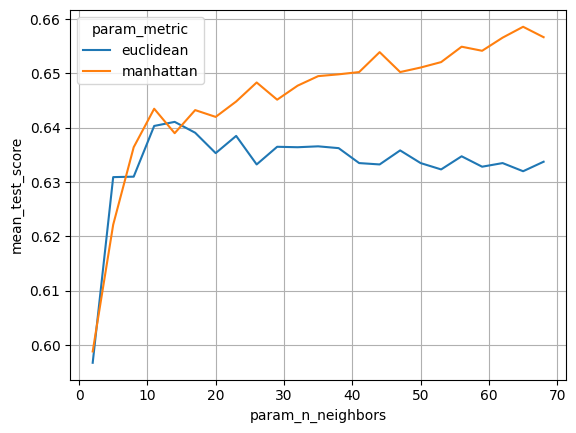

In [ ]:
# 이를 차트로 그려봅시다.
# x축은 knn에서 k값, y축은 accuracy
sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = temp
             , hue = 'param_metric' )
plt.grid()
plt.show()

### (3) 실습 : Grid Search

* 사용할 알고리즘 : decision tree
* 튜닝 방식 : Grid Search
    * 조절해 볼 만한 파라미터 : 아래 값의 범위에서 튜닝을 시도하세요.
        * max_depth : 1 ~ 15 ▶ range(1,16)
        * min_samples_leaf : 10, 30, 50

In [ ]:
# 1) 파라미터를 dictionary형태로 선언
params = { 'max_depth': range(1,16),
          'min_samples_leaf' : [10,30,50]}
params

{'max_depth': range(1, 16), 'min_samples_leaf': [10, 30, 50]}

In [ ]:
# 2) 함수 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# 3) 모델 선언
# 기본 모델
tree = DecisionTreeClassifier()

# Grid Search 설정
tree_gs = GridSearchCV(tree,
                       params,
                       cv=5)

In [ ]:
# 4) 학습
tree_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 16),
                         'min_samples_leaf': [10, 30, 50]})

In [ ]:
# 5) 선택된 best parameter는?
print(tree_gs.best_params_)

# 6) best parameter에서의 cv 성능은?
print(tree_gs.best_score_)

{'max_depth': 4, 'min_samples_leaf': 30}
0.7025


In [ ]:
# 7) 예측 및 평가
pred2 = tree_gs.predict(x_val)
accuracy_score(y_val, pred2)

0.7025